# **Crawling Situs Berita 3 Kategori Sumber: radarjatim.com**

### 1.Install package dan requirements
Jika pada pc anda belum terinstall package requests maka melakukan langkah awal installasi requests yang bertujuan untuk mengirim permintaan HTTP ke server.

In [ ]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

### 2. Memilih 3 Category yang akan di crawling dari radarjatim.com
Crawling merupakan alat otomatis yang mengumpulkan beragam informasi dengan menjelajahi berbagai halaman web. Proses ini mencakup identifikasi serta ekstraksi elemen-elemen seperti teks, gambar, dan unsur lainnya, sehingga membentuk pemahaman menyeluruh tentang konten yang tersebar di internet.

In [ ]:
kategori_list =  ['religi', 'sosial', 'pendidikan']
k =  ['Religi', 'Sosial', 'Pendidikan']

jumlah_halaman = 35

 # contoh scraping 5 halaman

def scraping_berita(kategori_list, halaman):
    with open('CrawlingBerita.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul', 'Content', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()


        for kategori in kategori_list:
            for page in range(1, halaman + 1):
                url = f'https://radarjatim.id/category/{kategori}/page/{page}/'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='jnews_category_content_wrapper').find('div', class_='jeg_block_container').find('div', class_='jeg_posts jeg_load_more_flag')
                berita_list = list_berita.find_all('article')
                for berita in berita_list:
                    link = berita.find('div', class_='jeg_postblock_content').find('div', class_='jeg_post_excerpt').find('a')['href']
                    headline = berita.find('div', class_='jeg_postblock_content').find('h3', class_='jeg_post_title').find('a').text
                    category = berita.find('div', class_='jeg_thumb').find('div', class_='jeg_post_category').find('span').find('a').text
                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find('div', class_='content-inner')
                    if category not in k :
                        print(f"Kategori dilewati.")
                        continue
                    if content_elem:
                        content_list = [p.text.strip() for p in content_elem.find_all('p') if p.text.strip()]
                        artikel = ' '.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').strip()
                    else:
                          artikel = ''
                    print(f"Data berhasil diambil - Kategori: {category}, Halaman: {page}, Judul: {headline}")

                    writer.writerow({'Judul': headline, 'Content': artikel, 'Category': category})

scraping_berita(kategori_list, jumlah_halaman)

Kategori dilewati.
Data berhasil diambil - Kategori: Religi, Halaman: 1, Judul: Bupati Galang Bantuan Palestina Terkumpul Rp 5 M
Kategori dilewati.
Kategori dilewati.
Kategori dilewati.
Data berhasil diambil - Kategori: Religi, Halaman: 1, Judul: Spirit Hari Pahlawan, Nurul Hayat Gelar Silaturahmi Akbar Guru Quran dan Galang Dana untuk Rakyat Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: Implementasikan P5 Siswa SMA YPM 2 Sukodono Observasi Antar Agama
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: MI Al Abror Kauman Shalat Ghoib dan Doa Bersama Untuk Pejuang Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 1, Judul: Siswa MTs dan MA  NU Sholat Ghaib Buat Syuhada Palestina
Data berhasil diambil - Kategori: Pendidikan, Halaman: 2, Judul: Santri Putri PP Jabal Nur Juara I  Duta Santri Pelajar NU 2023
Data 

## **Preprocessing**
Data Preprocessing merupakan salah satu tahapan dalam melakukan mining data. Sebelum menuju ke tahap pemprosesan. Data mentah akan diolah terlebih dahulu. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai. Selain itu dalam proses ini data akan diubah dalam bentuk yang akan lebih dipahami oleh sistem.

### 1.Install Package
Hal yang harus dilakukan adalah install libraray yang dibutuhkan.





### 2.Read Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/aulyamiftahkhulhikmah/Dataset/main/CrawlingBerita%20(2).csv')
df


,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


#### Cek Missing Value

In [ ]:
df.isnull().sum()

Judul       0
Content     2
Category    0
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

#### Cek Duplikasi Kalimat

In [ ]:
df.duplicated().sum()

54

In [ ]:
df = df.drop_duplicates()

#### Cleansing

In [ ]:
import re
df['data_bersih'] = df['Content'].apply(lambda x: re.sub(r'[^\w\s,.?!]', '', str(x).lower()))
print(df)

                                                 Judul  \
0     Bupati Galang Bantuan Palestina Terkumpul Rp 5 M   
1    Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...   
2    Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...   
3    MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...   
4    MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...   
..                                                 ...   
745  Ribuan PAUD se Kecamatan  Gedangan Pawai HAN k...   
746  KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...   
747     Lulusan SLTA Barunawati Banyak Diterima di PTN   
748       Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot   
749  Budayakan Literasi, Mutiara Rindang Berikan Ba...   

                                               Content    Category  \
0    SIDOARJO (RadarJatim.id) —  Bupati Sidoarjo Ah...      Religi   
1    GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...      Religi   
2    SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...  Pendidikan   
3    SIDOARJO (RadarJat

#### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi unit-unit kecil yang disebut token. Token bisa berupa kata, frasa, kalimat, atau entitas lain tergantung pada tingkat granularitas yang diinginkan. Proses ini merupakan langkah awal dalam pemrosesan teks dan dapat membantu analisis lebih lanjut, ekstraksi fitur, atau pemodelan bahasa.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['tokenizing'] = df['data_bersih'].apply(lambda x: sent_tokenize(str(x)))
print(df)

                                                 Judul  \
0     Bupati Galang Bantuan Palestina Terkumpul Rp 5 M   
1    Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...   
2    Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...   
3    MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...   
4    MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...   
..                                                 ...   
745  Ribuan PAUD se Kecamatan  Gedangan Pawai HAN k...   
746  KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...   
747     Lulusan SLTA Barunawati Banyak Diterima di PTN   
748       Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot   
749  Budayakan Literasi, Mutiara Rindang Berikan Ba...   

                                               Content    Category  \
0    SIDOARJO (RadarJatim.id) —  Bupati Sidoarjo Ah...      Religi   
1    GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...      Religi   
2    SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...  Pendidikan   
3    SIDOARJO (RadarJat

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
len(df['tokenizing'])

694

### 3.TF-IDF
Semakin tinggi nilai TF-IDF suatu kata dalam suatu dokumen, semakin penting kata tersebut dalam konteks dokumen tersebut dan koleksi dokumen secara keseluruhan. Metode ini sering digunakan dalam representasi fitur teks untuk analisis teks, klasifikasi dokumen, dan tugas-tugas pemrosesan teks lainnya.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer

In [ ]:
tfidf_results = []
tfidf_vectorizer = TfidfVectorizer()

for i in range(len(df['tokenizing'])):
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenizing'][i])
    tfidf_results.append(tfidf_matrix)

for idoc, tfidf_matrix in enumerate(tfidf_results):
    print(f'================================ Dokumen ke-{idoc} ================================')


    arr_tfidf_results = tfidf_matrix.toarray()

    for index, hasil_tfidf in enumerate(arr_tfidf_results):

        print(f'TF-IDF Kalimat ke-{index + 1}: {list(hasil_tfidf)}')
    print('\n')


Output hidden; open in https://colab.research.google.com to view.

### 4. Cossine Simmilarity
Merupakan metode untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Biasanya, cosine similarity digunakan dalam pemrosesan bahasa alami dan pengelompokan dokumen untuk menentukan seberapa serupa atau berbeda dua dokumen berdasarkan representasi vektor mereka.



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [ ]:
cos_sim_result = []
graf_result = []
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):


  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc])

  for i_hasil in range(len(cos_sim)):
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)):
      if cos_sim[i_hasil][j_hasil] > treshold:


        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]])
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil])

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
   #print('\n')

In [ ]:

for i, cos_sim_now in enumerate(cos_sim_result):
    print(f'============= Document ke - {i} ==============')

    for j, similar_pairs in enumerate(cos_sim_now):
        for idx1, idx2, hasil in similar_pairs:
            print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')

    print('\n')


Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 1 : 13 = 0.33016454900828046
Cosine Similarity Kalimat 1 : 15 = 0.20297222420272584
Cosine Similarity Kalimat 1 : 18 = 0.09271135293153783
Cosine Similarity Kalimat 1 : 22 = 0.13756516958661702
Cosine Similarity Kalimat 1 : 24 = 0.10017791872830269
Cosine Similarity Kalimat 1 : 27 = 0.08600715362740959
Cosine Similarity Kalimat 1 : 29 = 0.17310836617130926
Cosine Similarity Kalimat 1 : 32 = 0.08407707988149672
Cosine Similarity Kalimat 1 : 35 = 0.08356318286863436
Cosine Similarity Kalimat 2 : 10 = 0.12290903608968494
Cosine Similarity Kalimat 2 : 12 = 0.080952610782005
Cosine Similarity Kalimat 2 : 18 = 0.10596450927211923
Cosine Similarity Kalimat 2 : 19 = 0.11361046838179684
Cosine Similarity Kalimat 2 : 22 = 0.08077648477648641
Cosine Similarity Kalimat 2 : 24 = 0.10194428034227421
Cosine Similarity Kalimat 2 : 27 = 0.08567190970022141
Cosine Similarity Kalimat 3 : 7 = 0.09586926588213104
Cosine Similarity

### 5.Closeness Centrality
Salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.

In [ ]:

closeness_centrality = nx.closeness_centrality(graf_result[0])
print("============= Closeness Centrality ==============")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

============= Closeness Centrality ==============
Node 0: Closeness Centrality = 0.0
Node 1: Closeness Centrality = 0.1
Node 6: Closeness Centrality = 0.4166666666666667
Node 8: Closeness Centrality = 0.2
Node 10: Closeness Centrality = 0.44545454545454544
Node 2: Closeness Centrality = 0.13333333333333333
Node 3: Closeness Centrality = 0.22499999999999998
Node 4: Closeness Centrality = 0.26666666666666666
Node 5: Closeness Centrality = 0.4166666666666667
Node 7: Closeness Centrality = 0.5444444444444444
Node 9: Closeness Centrality = 0.3272727272727272


#### Menampilkan graf hanya 3 dokumen sebagai sample

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')


  print('\n')

Streaming output truncated to the last 5000 lines.
Closenes Centrality Node 7 = 0.0
Closenes Centrality Node 10 = 0.19838056680161942
Closenes Centrality Node 12 = 0.1871345029239766
Closenes Centrality Node 18 = 0.09473684210526315


========= document ke-442 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.05555555555555555
Closenes Centrality Node 2 = 0.1111111111111111
Closenes Centrality Node 3 = 0.125
Closenes Centrality Node 5 = 0.05555555555555555
Closenes Centrality Node 7 = 0.2722222222222222
Closenes Centrality Node 10 = 0.2314814814814815
Closenes Centrality Node 8 = 0.35555555555555557
Closenes Centrality Node 11 = 0.3472222222222222
Closenes Centrality Node 4 = 0.14814814814814814
Closenes Centrality Node 6 = 0.1736111111111111
Closenes Centrality Node 13 = 0.37345679012345684
Closenes Centrality Node 15 = 0.39120370370370366
Closenes Centrality Node 16 = 0.3055555555555556
Closenes Centrality Node 9 = 0.0
Closenes Centrality Node 17 = 0.268

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1
Closenes Centrality Node 6 = 0.4166666666666667
Closenes Centrality Node 8 = 0.2
Closenes Centrality Node 10 = 0.44545454545454544
Closenes Centrality Node 2 = 0.13333333333333333
Closenes Centrality Node 3 = 0.22499999999999998
Closenes Centrality Node 4 = 0.26666666666666666
Closenes Centrality Node 5 = 0.4166666666666667
Closenes Centrality Node 7 = 0.5444444444444444
Closenes Centrality Node 9 = 0.3272727272727272


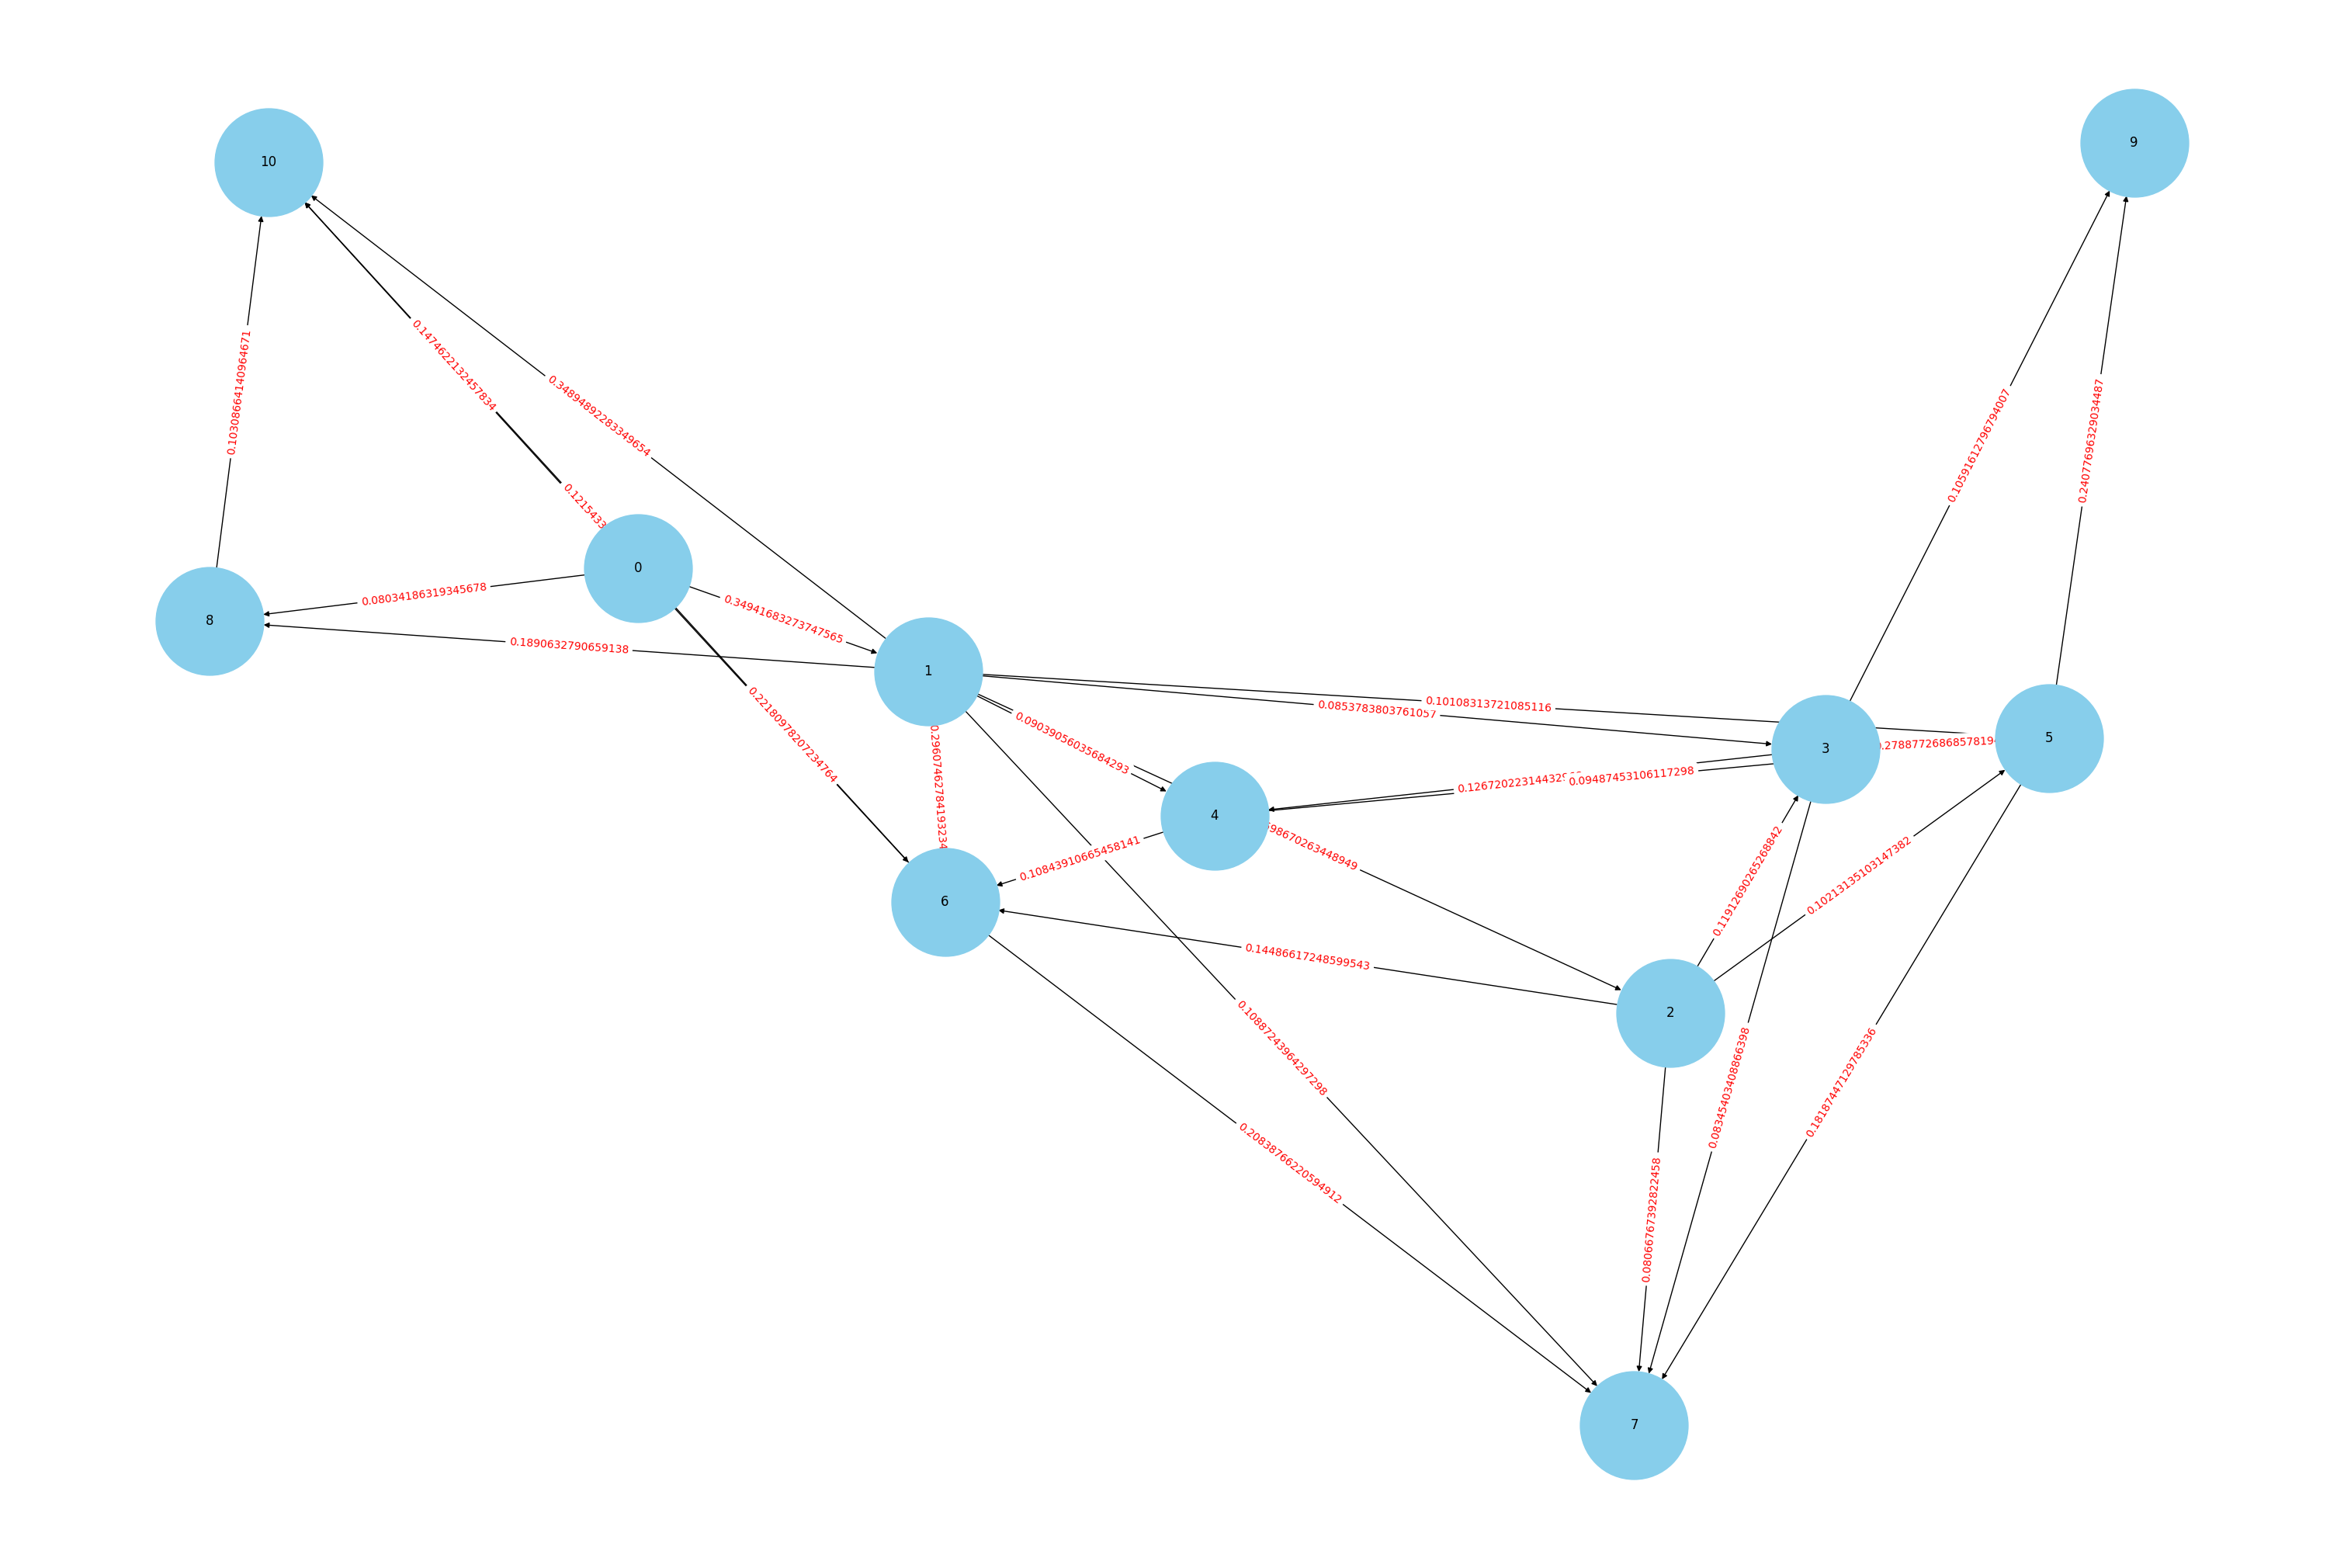



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.14285714285714285
Closenes Centrality Node 4 = 0.45714285714285713
Closenes Centrality Node 2 = 0.19047619047619047
Closenes Centrality Node 3 = 0.3214285714285714
Closenes Centrality Node 8 = 0.5714285714285714
Closenes Centrality Node 9 = 0.5833333333333334
Closenes Centrality Node 7 = 0.0


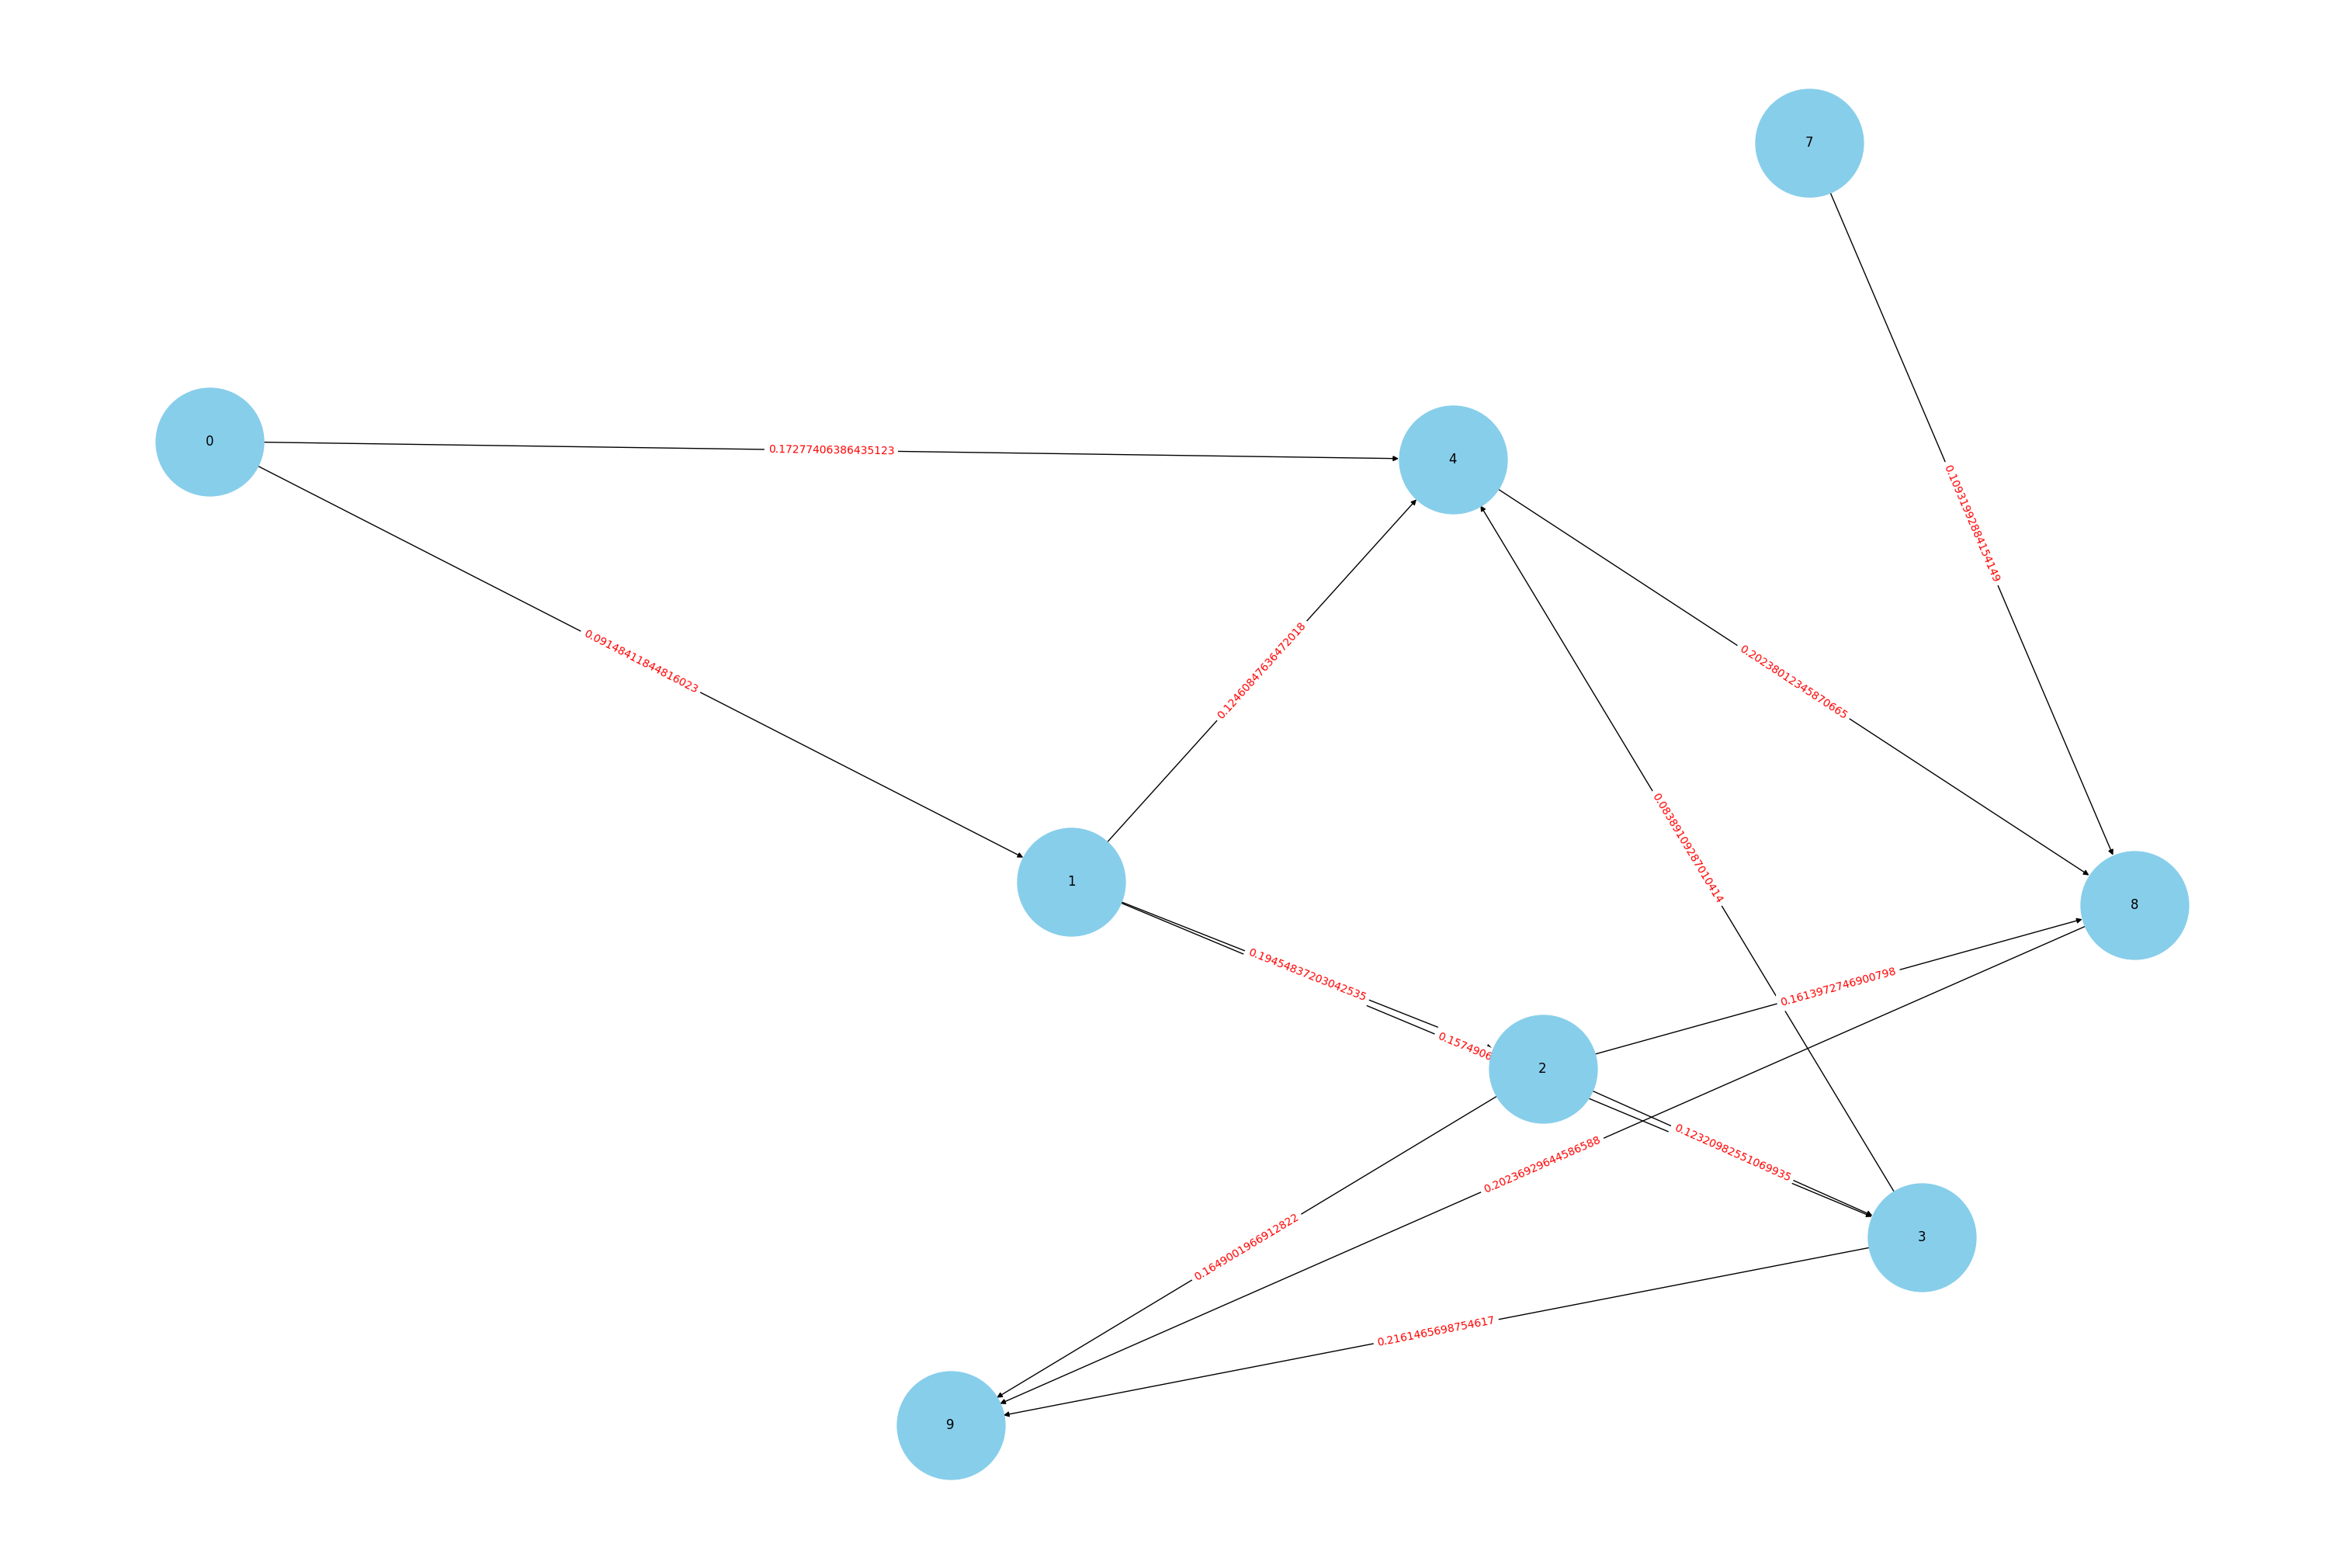



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.07692307692307693
Closenes Centrality Node 5 = 0.27472527472527475
Closenes Centrality Node 8 = 0.2517482517482517
Closenes Centrality Node 9 = 0.37869822485207105
Closenes Centrality Node 11 = 0.6205128205128204
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 3 = 0.07692307692307693
Closenes Centrality Node 4 = 0.10256410256410256
Closenes Centrality Node 6 = 0.0
Closenes Centrality Node 10 = 0.07692307692307693
Closenes Centrality Node 7 = 0.0
Closenes Centrality Node 12 = 0.10256410256410256
Closenes Centrality Node 13 = 0.41025641025641024


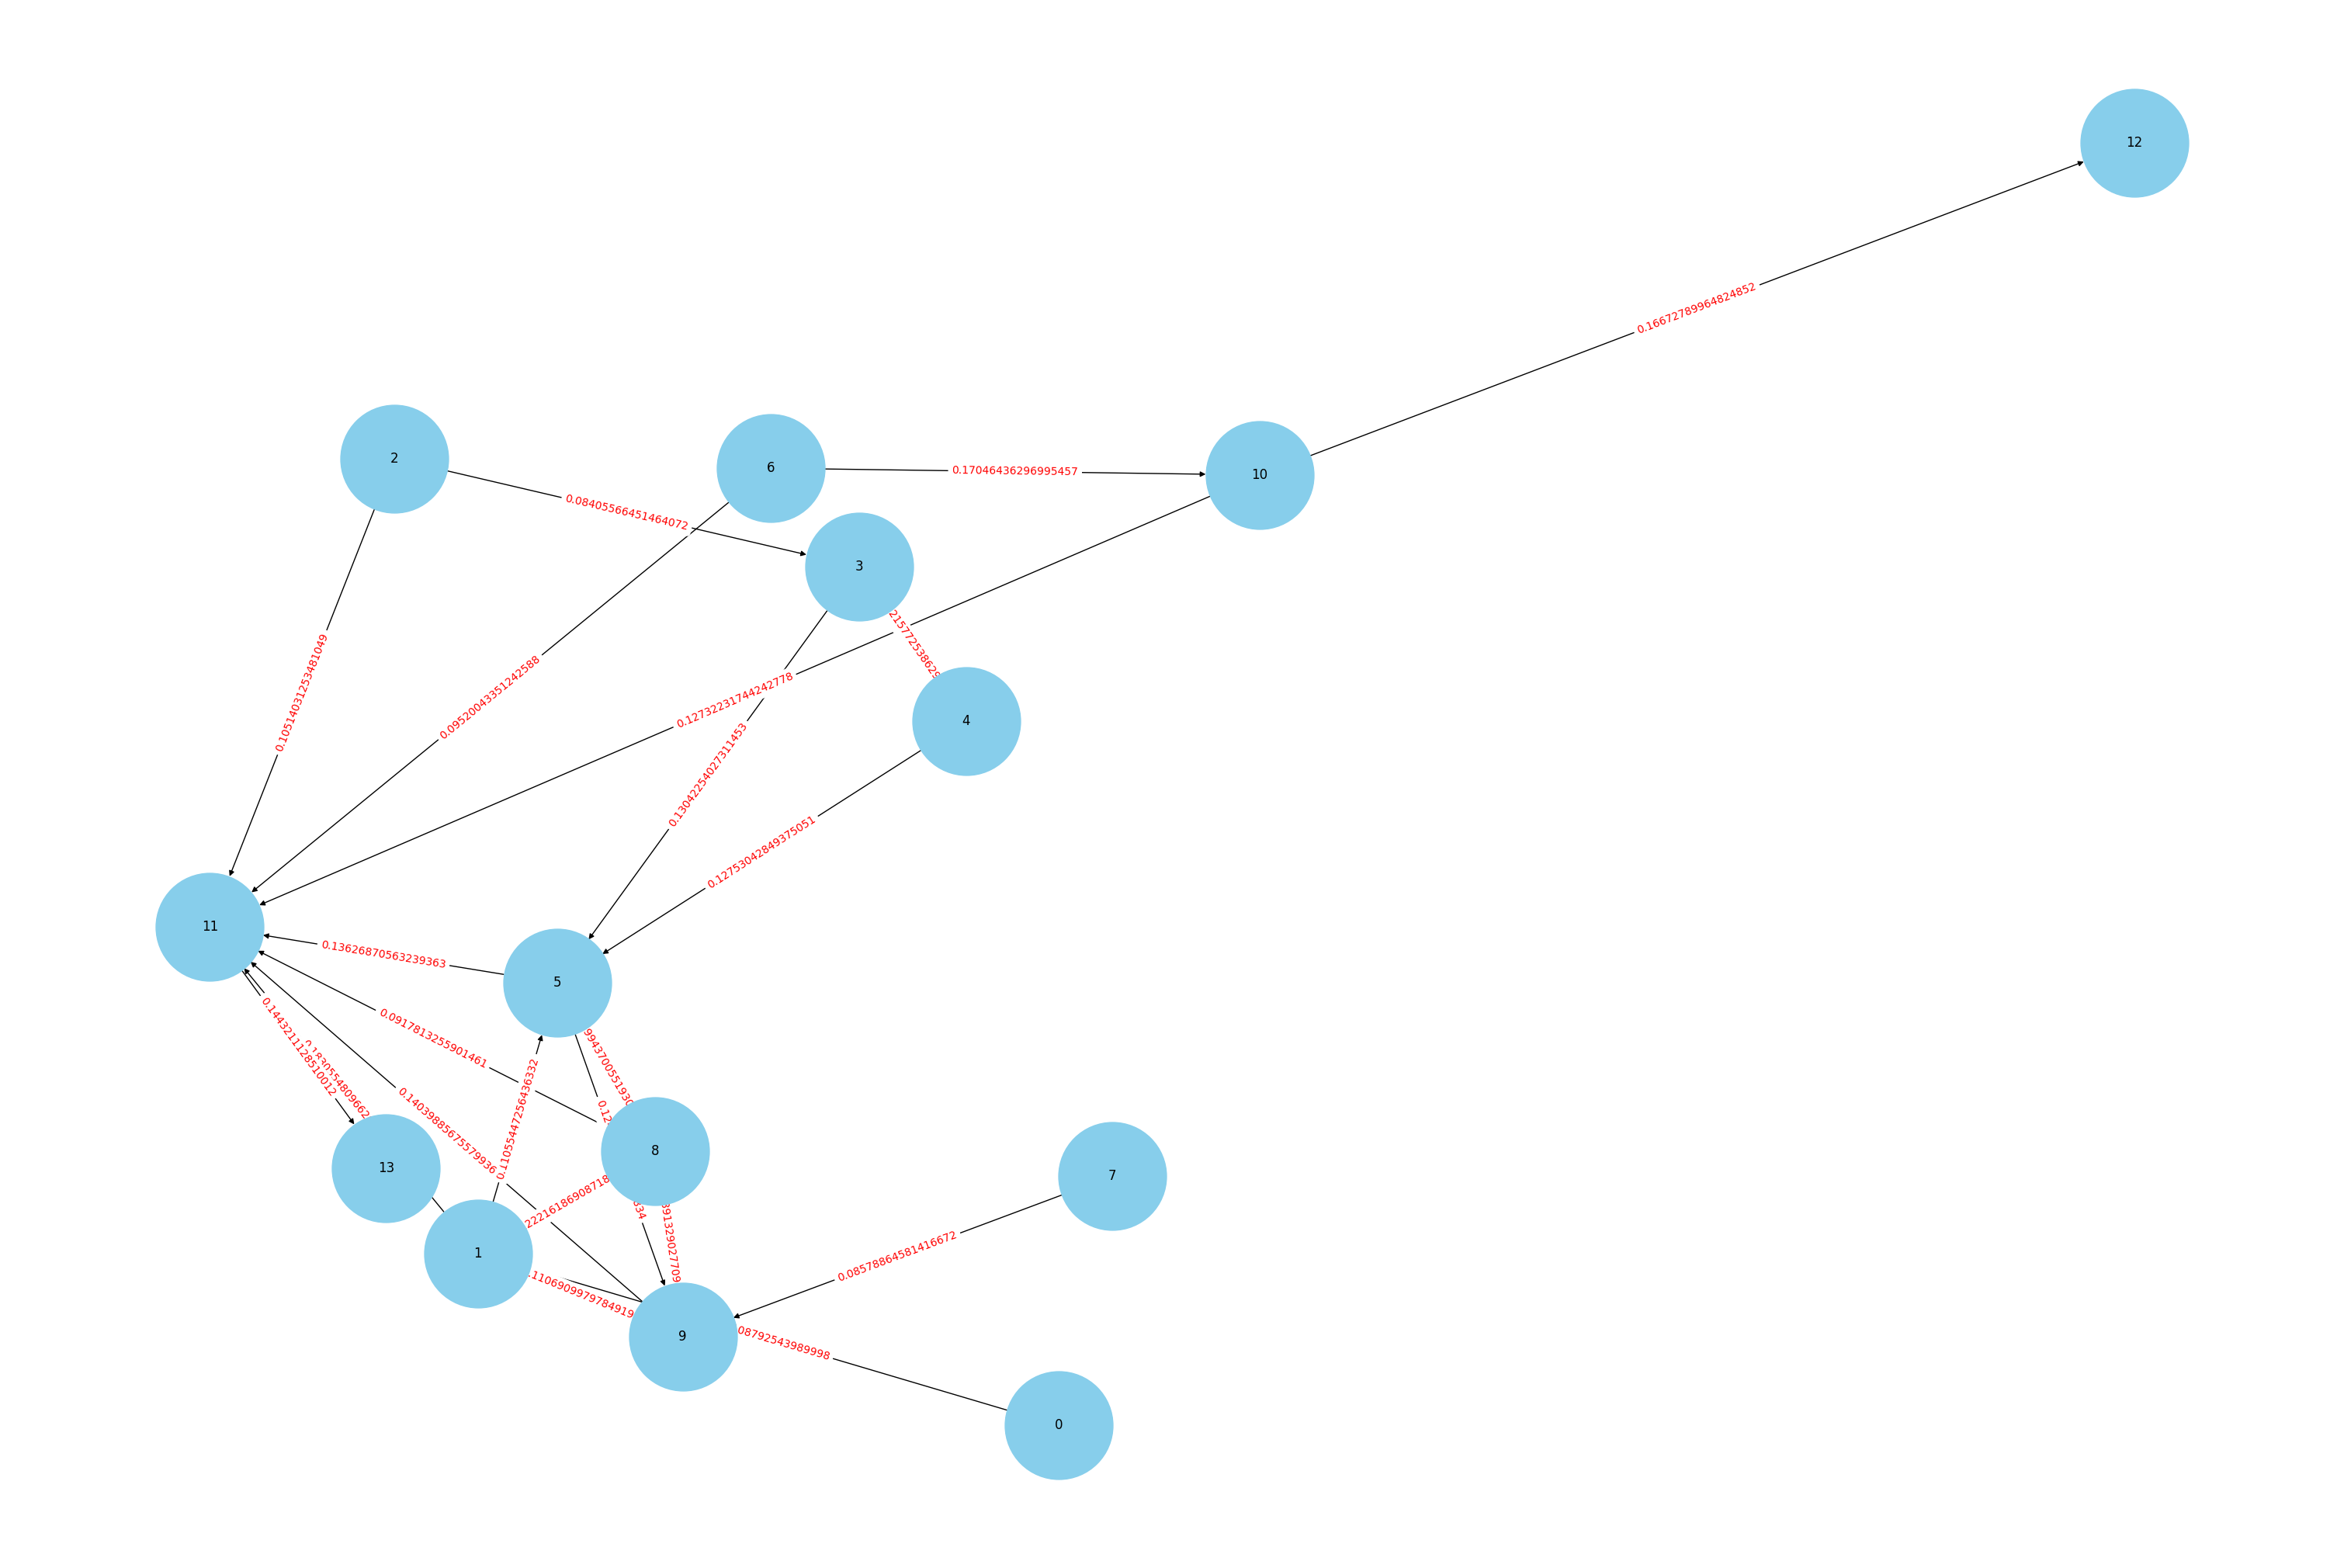



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 2 = 0.1111111111111111
Closenes Centrality Node 4 = 0.3333333333333333
Closenes Centrality Node 3 = 0.14814814814814814
Closenes Centrality Node 7 = 0.39682539682539686
Closenes Centrality Node 8 = 0.25
Closenes Centrality Node 9 = 0.5470085470085471
Closenes Centrality Node 5 = 0.0
Closenes Centrality Node 6 = 0.0


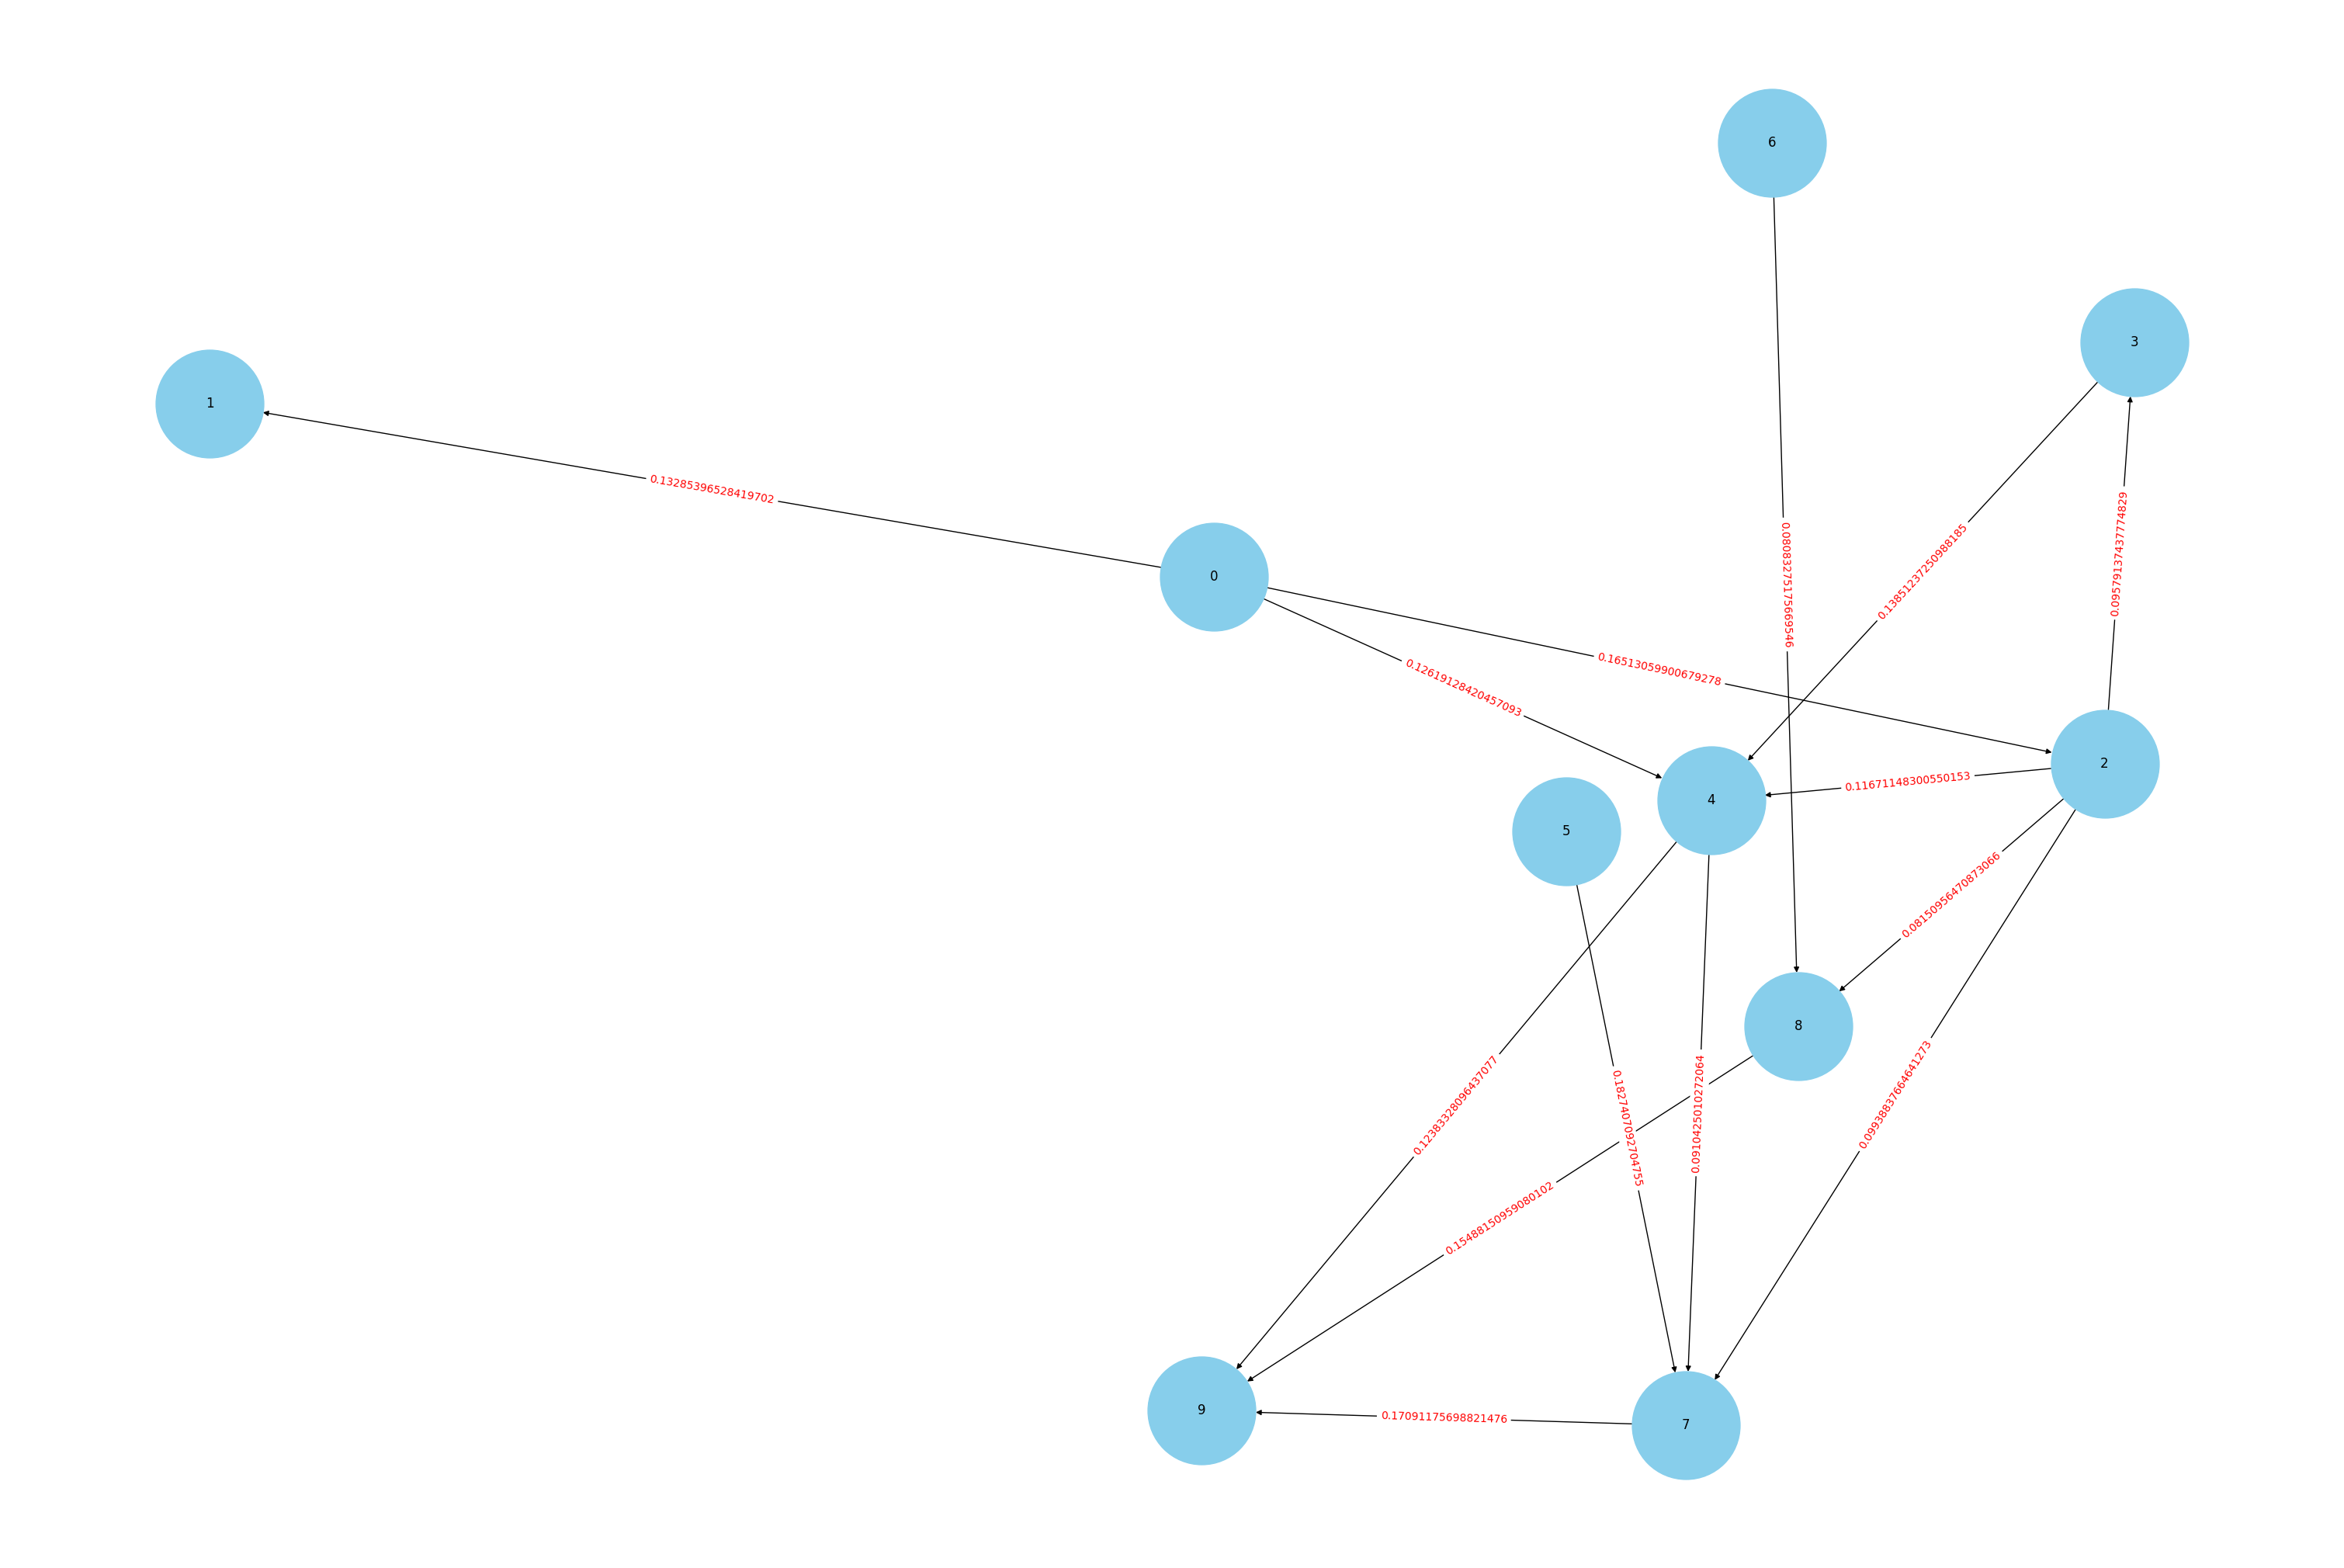

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')



  pos = nx.spring_layout(graf_result[i])
  labels = nx.get_edge_attributes(graf_result[i], 'weight')

  plt.figure(figsize=(30, 20))

  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

### 6.Summary
Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.

In [ ]:
summary = []
for i in range(len(graf_result)):

  cc = nx.closeness_centrality(graf_result[i])
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True))

  lists = list(cc.keys())[:3]

  current_summary = []

  for key,value in cc.items():

    current_summary.append(df['tokenizing'][i][key])
  summary.append(current_summary)

In [ ]:

summary_result = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = "".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil)

In [ ]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Category']],axis=1)
dataSummary

,Summary,Category
0,meskipun kita tidak bisa membantu datang langs...,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan
...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan


### Save Data

In [ ]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Category': df['Category'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'DatasummaryRadarJatim.csv'
fieldnames = ['Summary', 'Category']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")


Data telah disimpan dalam file DatasummaryRadarJatim.csv


## **Modelling Data Summary**

### EDA (Explorasi Data Analysis)
proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.

In [ ]:
import pandas as pd
import numpy as np

### 1.Read Data

In [ ]:
dtsummary = pd.read_csv("/content/DatasummaryRadarJatim.csv")
dtsummary

,Summary,Category
0,meskipun kita tidak bisa membantu datang langs...,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan
...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan


## **PreProcessing**

### 1.Missing Value

In [ ]:
dtsummary.isna().sum()

Summary     1
Category    0
dtype: int64

In [ ]:
dtsummary = dtsummary.dropna()


In [ ]:
dtsummary.isna().sum()

Summary     0
Category    0
dtype: int64

### 2. Duplicate Data

In [ ]:
dtsummary.duplicated().sum()

0

### 3.Cleaning


#### Punctuation

In [ ]:
import string


dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

dtsummary['summary_punct'] = dtsummary['summary_punct'].str.replace('\d+', '', regex=True)

<ipython-input-30-27b9f430ff71>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
<ipython-input-30-27b9f430ff71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
<ipython-input-30-27b9f430ff71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [ ]:
dtsummary

,Summary,Category,summary_punct
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...


#### Stopword
Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.

Import Library

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

<ipython-input-33-02ab89031a9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


In [ ]:
dtsummary

,Summary,Category,summary_punct,summary_stopwords
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...


#### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.

In [ ]:
dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)
dtsummary

<ipython-input-35-a03e79ff1886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)


,Summary,Category,summary_punct,summary_stopwords,summary_tokens
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang..."
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak..."
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,..."
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,..."
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ..."
...,...,...,...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk..."
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany..."
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul..."
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant..."


In [ ]:
# menggabungkan kata
dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-36-63dc6bd361cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))


In [ ]:
dtsummary

,Summary,Category,summary_punct,summary_stopwords,summary_tokens,summary_final
0,meskipun kita tidak bisa membantu datang langs...,Religi,meskipun kita tidak bisa membantu datang langs...,meskipun kita tidak bisa membantu datang langs...,"[meskipun, kita, tidak, bisa, membantu, datang...",meskipun kita tidak bisa membantu datang langs...
1,kami haturkan terima kasih sebanyakbanyaknya k...,Religi,kami haturkan terima kasih sebanyakbanyaknya k...,kami haturkan terima kasih sebanyakbanyaknya k...,"[kami, haturkan, terima, kasih, sebanyakbanyak...",kami haturkan terima kasih sebanyakbanyaknya k...
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",Pendidikan,fauzi sagmpdi berharap buku karya siswa dan si...,fauzi sagmpdi berharap buku karya siswa dan si...,"[fauzi, sagmpdi, berharap, buku, karya, siswa,...",fauzi sagmpdi berharap buku karya siswa dan si...
3,mereka sulit berobat karena rumah sakit telah ...,Pendidikan,mereka sulit berobat karena rumah sakit telah ...,mereka sulit berobat karena rumah sakit telah ...,"[mereka, sulit, berobat, karena, rumah, sakit,...",mereka sulit berobat karena rumah sakit telah ...
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",Pendidikan,ia jelaskan kalau shalat ghoib diikuti semua s...,ia jelaskan kalau shalat ghoib diikuti semua s...,"[ia, jelaskan, kalau, shalat, ghoib, diikuti, ...",ia jelaskan kalau shalat ghoib diikuti semua s...
...,...,...,...,...,...,...
689,daya ungkit secara ekonomi dapat dilakukan lew...,Pendidikan,daya ungkit secara ekonomi dapat dilakukan lew...,daya ungkit secara ekonomi dapat dilakukan lew...,"[daya, ungkit, secara, ekonomi, dapat, dilakuk...",daya ungkit secara ekonomi dapat dilakukan lew...
690,"seminar ini, diharapkan akan semakin banyak or...",Pendidikan,seminar ini diharapkan akan semakin banyak ora...,seminar ini diharapkan akan semakin banyak ora...,"[seminar, ini, diharapkan, akan, semakin, bany...",seminar ini diharapkan akan semakin banyak ora...
691,acara hut ybbs dihadiri semua unsur mulai dari...,Pendidikan,acara hut ybbs dihadiri semua unsur mulai dari...,acara hut ybbs dihadiri semua unsur mulai dari...,"[acara, hut, ybbs, dihadiri, semua, unsur, mul...",acara hut ybbs dihadiri semua unsur mulai dari...
692,"mulai dari mengajari anakanak sd, membantu di ...",Pendidikan,mulai dari mengajari anakanak sd membantu di p...,mulai dari mengajari anakanak sd membantu di p...,"[mulai, dari, mengajari, anakanak, sd, membant...",mulai dari mengajari anakanak sd membantu di p...


In [ ]:
dtsummary.to_csv('DataSummaryBerita.csv')

### 4.Vector Space Model (VSM)
VSM adalah singkatan dari “Vector Space Model” atau dalam bahasa Indonesia dapat diartikan sebagai “Model Ruang Vektor”. Ini adalah sebuah pendekatan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) yang digunakan untuk merepresentasikan teks dalam bentuk vektor dalam ruang multidimensi.

#### TF-IDF
metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
summ_tfidf_vectorizer = TfidfVectorizer()

summ_tfidf_matrix = summ_tfidf_vectorizer.fit_transform(dtsummary['summary_final'])

summ_tfidf_df = pd.DataFrame(summ_tfidf_matrix.toarray(),columns=summ_tfidf_vectorizer.get_feature_names_out())
summ_tfidf_df = pd.concat([dtsummary['Summary'],summ_tfidf_df,dtsummary['Category']],axis=1)

summ_tfidf_df

,Summary,aa,aaakhoru,aaat,aamiin,aamiini,aaron,aau,aba,abaaba,...,عليكم,فصللربكوانحر,قبلكم,كتب,كما,لعلكم,من,وعلمهrasulullah,يا,Category
0,meskipun kita tidak bisa membantu datang langs...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
1,kami haturkan terima kasih sebanyakbanyaknya k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Religi
2,"fauzi, s,ag.m.pd.i berharap buku karya siswa d...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
3,mereka sulit berobat karena rumah sakit telah ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
4,"ia jelaskan, kalau shalat ghoib diikuti semua ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,"seminar ini, diharapkan akan semakin banyak or...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
691,acara hut ybbs dihadiri semua unsur mulai dari...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
692,"mulai dari mengajari anakanak sd, membantu di ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
693,acara peresmian dan pembukaan perpustakaan ram...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan


In [ ]:
summ_tfidf_df.isnull().sum()

Summary            1
aa                 1
aaakhoru           1
aaat               1
aamiin             1
                  ..
لعلكم              1
من                 1
وعلمهrasulullah    1
يا                 1
Category           1
Length: 17329, dtype: int64

In [ ]:
summ_tfidf_df = summ_tfidf_df.dropna()

In [ ]:
summ_tfidf_df.to_csv('TF-IDF Summary.csv')

In [ ]:
df.isnull().sum()

Judul          0
Content        0
Category       0
data_bersih    0
tokenizing     0
dtype: int64

### 5. Modelling

#### Split Dataset

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
X_tfidf = summ_tfidf_df.iloc[:,1:-1]
y_tfidf = summ_tfidf_df["Category"]
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

#### Persiapkan Library

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

#### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.7913669064748201


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

rf.fit(X_tfidf_train, y_tfidf_train)

y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')


Akurasi model Random Forest: 0.7410071942446043


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_tfidf_train, y_tfidf_train)

y_pred = naive_bayes.predict(X_tfidf_test)

accuracy_naiveBayes = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.7266187050359713


In [ ]:
import joblib

In [ ]:
joblib.dump(summ_tfidf_vectorizer, 'tfidfvectorizer')


['tfidfvectorizer']

#### SVM

In [ ]:
from sklearn.svm import SVC
# Buat objek SVM
svm = SVC()

# Latih model pada kolom topik tertentu
svm.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred_svm = svm.predict(X_tfidf_test)

# Hitung akurasi model SVM
accuracy_svm = accuracy_score(y_tfidf_test, y_pred_svm)

# Cetak hasil akurasi
print(f'Akurasi model SVM: {accuracy_svm}')

Akurasi model SVM: 0.7913669064748201


### 5.Evaluasi

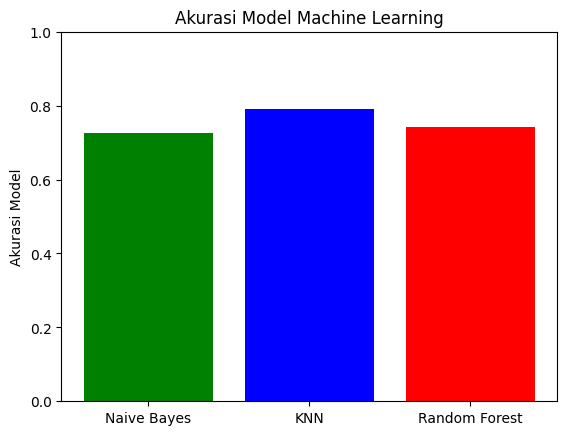

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()

### 6.Implementasi

In [ ]:
# ========== data inputan ==========
new_data = str(input("masukkan data: "))
# tokenizing kalimat
new_data = sent_tokenize(new_data)
# new_data

# ========== vectorize ==========
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
inp_tfidf_vectorizer = TfidfVectorizer()
# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
inp_tfidf_matrix = inp_tfidf_vectorizer.fit_transform(new_data)
# inp_tfidf_matrix.toarray()